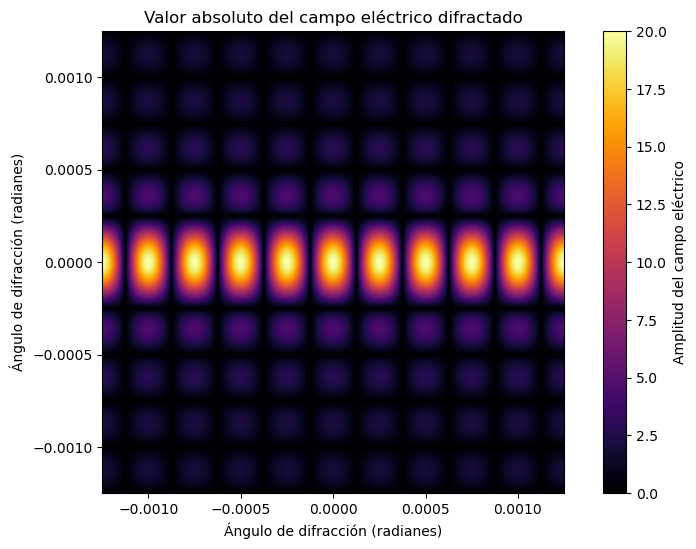

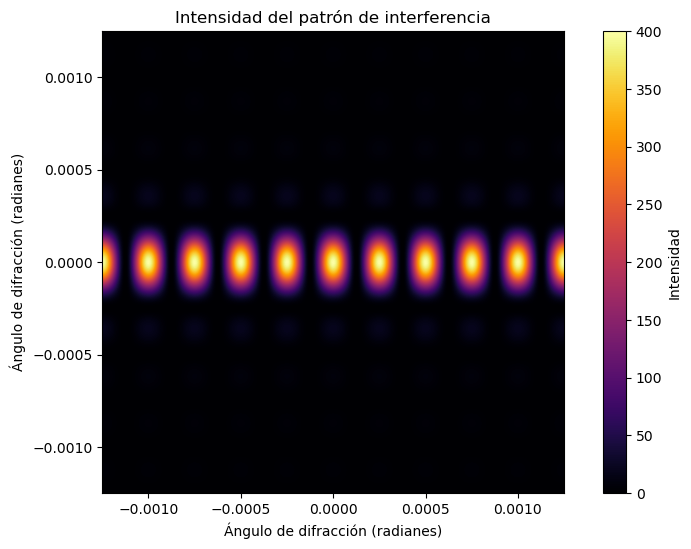

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftshift, fft2

# Parámetros
num_points = 1000  # Resolución de la simulación
slit_width = 10  # Ancho de cada rendija (en pixeles)
slit_distance = 10  # Separación entre las dos rendijas (en pixeles)
wavelength = 400e-9  # Longitud de onda de la luz (en metros)
screen_distance = 4.0  # Distancia de la pantalla a las rendijas (en metros)
pixel_size = 10e-6  # Tamaño del pixel en metros (para la simulación)

# Crear la función de rendijas (rectángulos)
slit_array = np.zeros((num_points, num_points))
center = num_points // 2
slit_array[center - slit_width//2:center + slit_width//2, center - slit_distance//2] = 1
slit_array[center - slit_width//2:center + slit_width//2, center + slit_distance//2] = 1

# Aplicar la Transformada de Fourier
fourier_image = fftshift(fft2(slit_array))

# Calcular el valor absoluto y la intensidad
absolute_field = np.abs(fourier_image)
intensity = np.abs(fourier_image)**2

# Ajustar las escalas para representar lo que verías en la pantalla
# Convertir a ángulo de difracción (aproximación de Fraunhofer)
x = np.linspace(-num_points//2, num_points//2, num_points) * pixel_size
theta_x = np.arctan(x / screen_distance)  # Ángulo en radianes

# Visualizar el valor absoluto del campo eléctrico
plt.figure(figsize=(10, 6))
plt.imshow(absolute_field, cmap='inferno', extent=(theta_x.min(), theta_x.max(), theta_x.min(), theta_x.max()))
plt.title('Valor absoluto del campo eléctrico difractado')
plt.xlabel('Ángulo de difracción (radianes)')
plt.ylabel('Ángulo de difracción (radianes)')
plt.colorbar(label='Amplitud del campo eléctrico')
plt.show()

# Visualizar la intensidad del patrón de difracción (módulo cuadrado)
plt.figure(figsize=(10, 6))
plt.imshow(intensity, cmap='inferno', extent=(theta_x.min(), theta_x.max(), theta_x.min(), theta_x.max()))
plt.title('Intensidad del patrón de interferencia')
plt.xlabel('Ángulo de difracción (radianes)')
plt.ylabel('Ángulo de difracción (radianes)')
plt.colorbar(label='Intensidad')
plt.show()



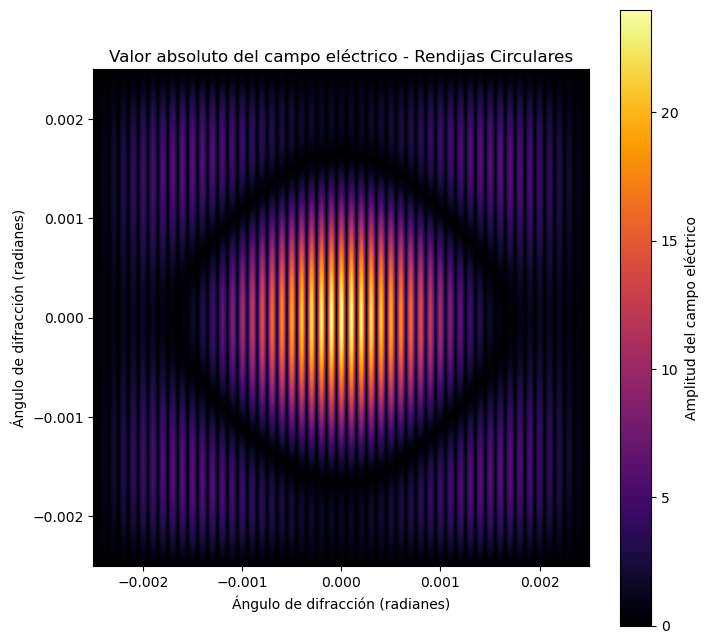

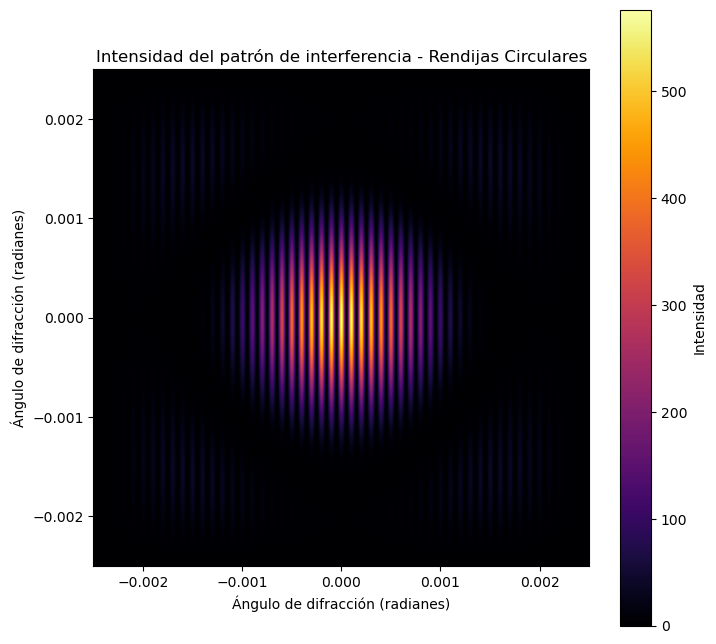

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftshift, fft2

# Parámetros
num_points = 500  # Resolución de la simulación
radius = 2  # Radio de las rendijas circulares (en pixeles)
distance_between_slits = 50  # Distancia entre los centros de las rendijas (en pixeles)
wavelength = 500e-9  # Longitud de onda de la luz (en metros)
screen_distance = 1.0  # Distancia de la pantalla a las rendijas (en metros)
pixel_size = 10e-6  # Tamaño del pixel en metros (para la simulación)

# Crear la función de rendijas circulares
x, y = np.meshgrid(np.linspace(-num_points/2, num_points/2, num_points),
                   np.linspace(-num_points/2, num_points/2, num_points))

# Definir dos rendijas circulares
slit_array = np.zeros_like(x)
slit_array[np.sqrt((x - distance_between_slits/2)**2 + y**2) <= radius] = 1
slit_array[np.sqrt((x + distance_between_slits/2)**2 + y**2) <= radius] = 1

# Aplicar la Transformada de Fourier
fourier_image = fftshift(fft2(slit_array))

# Calcular el valor absoluto y la intensidad
absolute_field = np.abs(fourier_image)
intensity = absolute_field**2

# Ajustar las escalas para representar lo que verías en la pantalla
# Convertir a ángulo de difracción (aproximación de Fraunhofer)
x_vals = np.linspace(-num_points//2, num_points//2, num_points) * pixel_size
theta_x = np.arctan(x_vals / screen_distance)  # Ángulo en radianes

# Visualizar el valor absoluto del campo eléctrico
plt.figure(figsize=(8, 8))
plt.imshow(absolute_field, cmap='inferno', extent=(theta_x.min(), theta_x.max(), theta_x.min(), theta_x.max()))
plt.title('Valor absoluto del campo eléctrico - Rendijas Circulares')
plt.xlabel('Ángulo de difracción (radianes)')
plt.ylabel('Ángulo de difracción (radianes)')
plt.colorbar(label='Amplitud del campo eléctrico')
plt.show()

# Visualizar la intensidad del patrón de difracción
plt.figure(figsize=(8, 8))
plt.imshow(intensity, cmap='inferno', extent=(theta_x.min(), theta_x.max(), theta_x.min(), theta_x.max()))
plt.title('Intensidad del patrón de interferencia - Rendijas Circulares')
plt.xlabel('Ángulo de difracción (radianes)')
plt.ylabel('Ángulo de difracción (radianes)')
plt.colorbar(label='Intensidad')
plt.show()



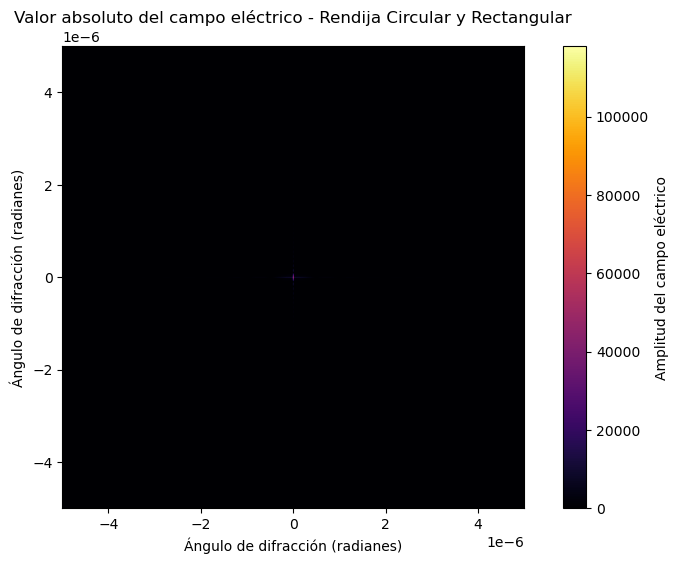

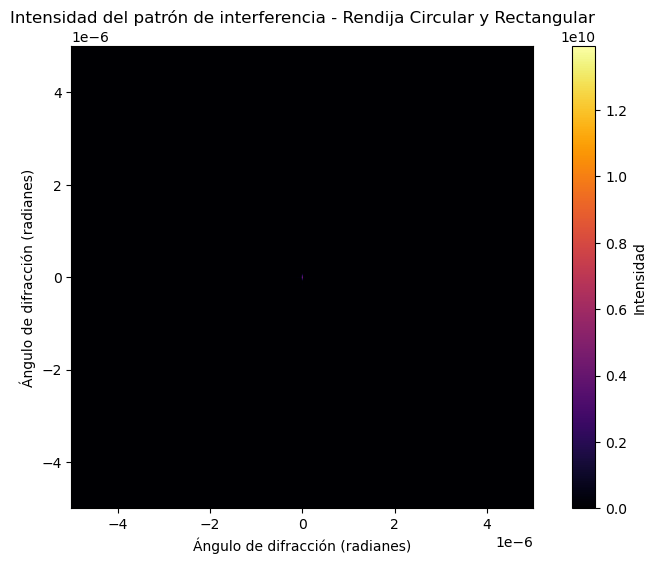

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftshift, fft2

# Parámetros ajustados
num_points = 1000  # Aumentar la resolución para mayor detalle
radius = 20  # Aumentar el radio de la rendija circular (en pixeles)
rect_slit_width = 20  # Aumentar el ancho de la rendija rectangular (en pixeles)
rect_slit_height = 100  # Aumentar la altura de la rendija rectangular (en pixeles)
distance_between_slits = 150  # Aumentar la distancia entre las rendijas (en pixeles)
wavelength = 500e-9  # Longitud de onda de la luz (en metros)
screen_distance = 1000  # Reducir la distancia a la pantalla (en metros)
pixel_size = 10e-6  # Tamaño del pixel en metros (para la simulación)

# Crear la función de rendijas (circular y rectangular)
x, y = np.meshgrid(np.linspace(-num_points/2, num_points/2, num_points),
                   np.linspace(-num_points/2, num_points/2, num_points))

# Definir la rendija circular
slit_array = np.zeros_like(x)
slit_array[np.sqrt((x - distance_between_slits/2)**2 + y**2) <= radius] = 1

# Definir la rendija rectangular
rect_center_x = -distance_between_slits/2  # Centro de la rendija rectangular
rect_center_y = 0  # Mantener en el eje y
slit_array[np.abs(x + rect_center_x) <= rect_slit_width/2] = 1
slit_array[np.abs(y - rect_center_y) <= rect_slit_height/2] = 1

# Aplicar la Transformada de Fourier
fourier_image = fftshift(fft2(slit_array))

# Calcular el valor absoluto y la intensidad
absolute_field = np.abs(fourier_image)
intensity = absolute_field**2

# Ajustar las escalas para representar lo que verías en la pantalla
# Convertir a ángulo de difracción (aproximación de Fraunhofer)
x_vals = np.linspace(-num_points//2, num_points//2, num_points) * pixel_size
theta_x = np.arctan(x_vals / screen_distance)  # Ángulo en radianes

# Visualizar el valor absoluto del campo eléctrico
plt.figure(figsize=(10, 6))
plt.imshow(absolute_field, cmap='inferno', extent=(theta_x.min(), theta_x.max(), theta_x.min(), theta_x.max()))
plt.title('Valor absoluto del campo eléctrico - Rendija Circular y Rectangular')
plt.xlabel('Ángulo de difracción (radianes)')
plt.ylabel('Ángulo de difracción (radianes)')
plt.colorbar(label='Amplitud del campo eléctrico')
plt.show()

# Visualizar la intensidad del patrón de difracción
plt.figure(figsize=(10, 6))
plt.imshow(intensity, cmap='inferno', extent=(theta_x.min(), theta_x.max(), theta_x.min(), theta_x.max()))
plt.title('Intensidad del patrón de interferencia - Rendija Circular y Rectangular')
plt.xlabel('Ángulo de difracción (radianes)')
plt.ylabel('Ángulo de difracción (radianes)')
plt.colorbar(label='Intensidad')
plt.show()
